In [15]:
using ITensors, ITensorMPS, PythonPlot

# Global variables to store results
global C1zz = nothing
global L = 20

# Main computation
let
    # Create L Spin-1/2 Indices
    sites = siteinds("S=1/2", L)

    # Create the Hamiltonian of the Ising chain at its self-dual critical point from the O'Brien and Fendley paper.
    osI = OpSum()
    for j in 1:(L - 1)
        osI -= "X", j 
        osI -= "Z", j, "Z", j + 1
    end
    osI -= "X", L
    osI -= "Z", L, "Z", 1
    HI = MPO(osI, sites)

    # Create the Hamiltonian of the three-spin interaction from the O'Brien and Fendley paper.
    os3 = OpSum()
    for j in 1:(L - 2)
        os3 += "X", j, "Z", j + 1, "Z", j + 2
        os3 += "Z", j, "Z", j + 1, "X", j + 2
    end
    os3 += "X", L - 1, "Z", L, "Z", 1
    os3 += "X", L, "Z", 1, "Z", 2
    os3 += "Z", L - 1, "Z", L, "X", 1
    os3 += "Z", L, "Z", 1, "X", 2
    H3 = MPO(os3, sites)

    # Coupling coefficients for Exact G.S.
        lambdaI = 1
        lambda3 = 1
    
    # Coupling coefficients for TCI such that lambda3 / lambdaI = 0.856
        # lambdaI = 0.759685
        # lambda3 = 0.650291
    
    # Energy offset
    EO = L * (lambdaI^2 + lambda3^2) / lambda3

    # Adding the energy offset to just one site
    osEO = OpSum()
        osEO += EO, "Id", 1 # "Id" is the identity operator
    E0 = MPO(osEO, sites)

    # Full Hamiltonian from paper
    H = 2 * lambdaI * HI + lambda3 * H3 + E0

    # Create an initial random matrix product state
    psi0 = random_mps(sites)
    nsweeps = 20

    maxdim = [10, 33, 66, 133, 200]
    mindim = maxdim
    cutoff = 1.0e-10

    # Run the DMRG algorithm, returning energy
    # (dominant eigenvalue) and optimized MPS
    println("Maxdim per sweep: ", maxdim)
    
    energy1, psi1 = dmrg(H, psi0; nsweeps, mindim, maxdim, cutoff)
    #energy2, psi2 = dmrg(H, [psi1], psi0; nsweeps, mindim, maxdim, cutoff, weight = 100)
    #energy3, psi3 = dmrg(H, [psi1, psi2], psi0; nsweeps, mindim, maxdim, cutoff, weight = 100)
    #energy4, psi4 = dmrg(H, [psi1, psi2, psi3], psi0; nsweeps, mindim, maxdim, cutoff, weight = 100)
    
    println("Final Energy 1 = $energy1")
    #println("Final Energy 2 = $energy2")
    #println("Final Energy 3 = $energy3")
    #println("Final Energy 4 = $energy4")
    
    println("Overlap 1,1 = $(inner(psi1, psi1))")
    #println("Overlap 1,2 = $(inner(psi1, psi2))")
    #println("Overlap 1,3 = $(inner(psi1, psi3))")
    #println("Overlap 1,4 = $(inner(psi1, psi4))")
    #println("Overlap 2,3 = $(inner(psi2, psi3))")
    #println("Overlap 2,4 = $(inner(psi2, psi4))")
    #println("Overlap 3,4 = $(inner(psi3, psi4))")

    # Compute Z-Z correlation matrix for the first G.S. and store in global
    global C1zz = correlation_matrix(psi1, "Z", "Z")

    nothing
end

Maxdim per sweep: [10, 33, 66, 133, 200]
After sweep 1 energy=1.1587674367794492  maxlinkdim=4 maxerr=7.77E-16 time=0.047
After sweep 1 energy=1.1587674367794492  maxlinkdim=4 maxerr=7.77E-16 time=0.047
After sweep 2 energy=3.2169401067773566e-5  maxlinkdim=16 maxerr=4.57E-16 time=0.042
After sweep 2 energy=3.2169401067773566e-5  maxlinkdim=16 maxerr=4.57E-16 time=0.042
After sweep 3 energy=9.13635359929809e-9  maxlinkdim=64 maxerr=5.65E-16 time=0.226
After sweep 3 energy=9.13635359929809e-9  maxlinkdim=64 maxerr=5.65E-16 time=0.226
After sweep 4 energy=5.5209170568559784e-12  maxlinkdim=133 maxerr=5.15E-16 time=1.860
After sweep 5 energy=-2.741066735803835e-13  maxlinkdim=200 maxerr=6.31E-16 time=3.191
After sweep 4 energy=5.5209170568559784e-12  maxlinkdim=133 maxerr=5.15E-16 time=1.860
After sweep 5 energy=-2.741066735803835e-13  maxlinkdim=200 maxerr=6.31E-16 time=3.191
After sweep 6 energy=-2.606004645684218e-13  maxlinkdim=200 maxerr=6.75E-18 time=3.678
After sweep 6 energy=-2.60

First few absolute correlation values: [1.0000000000000002, 0.9999999999985575, 0.9999999999985578, 0.9999999999985578, 0.999999999998558]


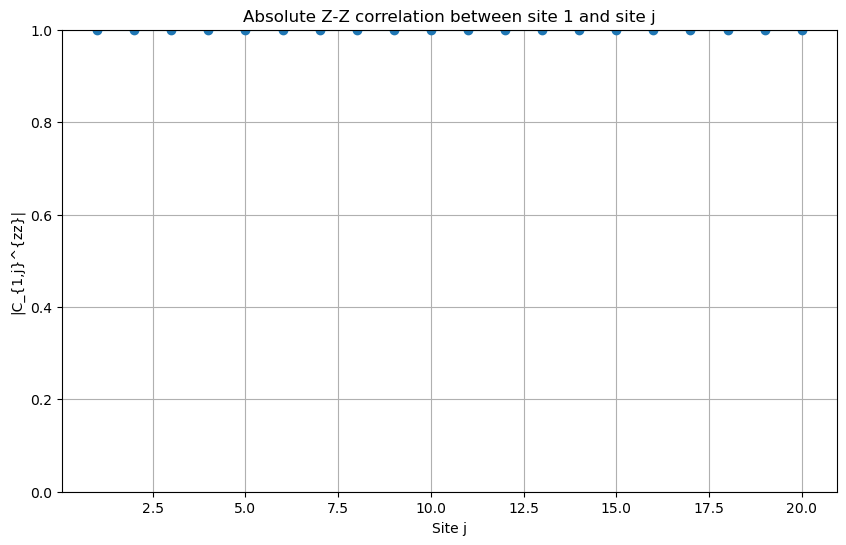


All correlation values:
Site 1: 1.0000000000000002
Site 2: 0.9999999999985575
Site 3: 0.9999999999985578
Site 4: 0.9999999999985578
Site 5: 0.999999999998558
Site 6: 0.9999999999985579
Site 7: 0.9999999999985583
Site 8: 0.9999999999985584
Site 9: 0.9999999999985586
Site 10: 0.9999999999985582
Site 11: 0.999999999998558
Site 12: 0.9999999999985579
Site 13: 0.999999999998558
Site 14: 0.9999999999985586
Site 15: 0.9999999999985587
Site 16: 0.9999999999985592
Site 17: 0.9999999999985589
Site 18: 0.9999999999985585
Site 19: 0.9999999999985589
Site 20: 0.9999999999985589

Site 1: 1.0000000000000002
Site 2: 0.9999999999985575
Site 3: 0.9999999999985578
Site 4: 0.9999999999985578
Site 5: 0.999999999998558
Site 6: 0.9999999999985579
Site 7: 0.9999999999985583
Site 8: 0.9999999999985584
Site 9: 0.9999999999985586
Site 10: 0.9999999999985582
Site 11: 0.999999999998558
Site 12: 0.9999999999985579
Site 13: 0.999999999998558
Site 14: 0.9999999999985586
Site 15: 0.9999999999985587
Site 16: 0.9999999

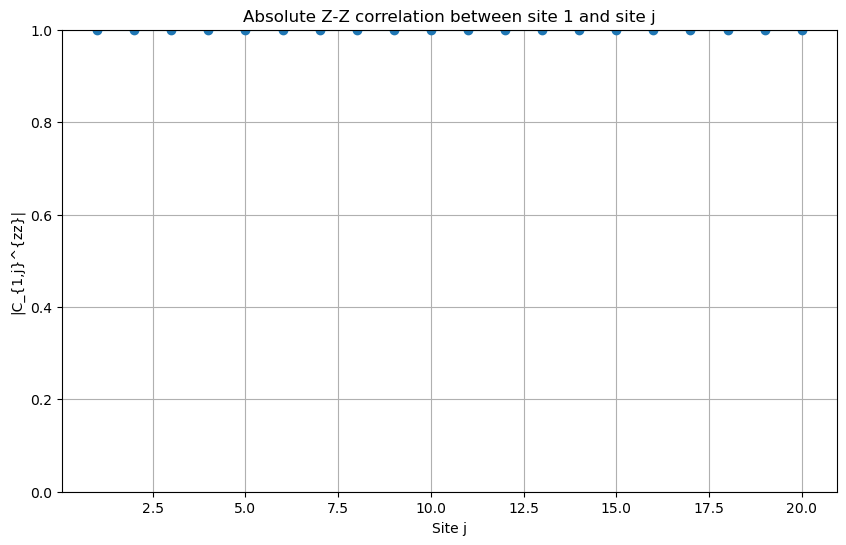

In [ ]:
# Cell 2: Plotting
using PythonPlot

# Check if C1zz is defined and not nothing
if @isdefined(C1zz) && !isnothing(C1zz)
    # Get the absolute values of correlations
    abs_C1zz = abs.(C1zz[1, :])
    
    # Create a new figure
    fig = figure(figsize=(10,6))  # Make the plot a bit larger
    
    x = collect(1:length(abs_C1zz))
    plot(x, abs_C1zz, marker="o", linestyle="-", color="tab:blue", linewidth=1.5)
    
    # Improve axis scaling and grid
    xlabel("Site j")
    ylabel("|C_{1,j}^{zz}|")
    title("Absolute Z-Z correlation between site 1 and site j")
    grid(true, which="major", alpha=0.5)
    grid(true, which="minor", alpha=0.2)
    
    # Adjust y-axis to show the data better
    ymax = maximum(abs_C1zz)
    ylim(0, ymax * 1.1)  # Add 10% padding on top
    
    # Add minor ticks for better readability
    minorticks_on()
    
    # Print max and min values for reference
    println("Maximum correlation: ", maximum(abs_C1zz))
    println("Minimum correlation: ", minimum(abs_C1zz))
    
    display(fig)
else
    println("Please run cell 1 first to compute C1zz")
end